/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - loss: 0.1113
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - loss: 0.0064
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 143ms/step - loss: 0.0050
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - loss: 0.0057
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - loss: 0.0042
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - loss: 0.0054
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - loss: 0.0050
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 142ms/step - loss: 0.0040
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - loss: 0.0044
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - loss: 0.0059
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - loss: 0.0047
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - loss: 0.0040
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 110ms/step - loss: 0.0046
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 140ms/step - loss: 0.0046
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1

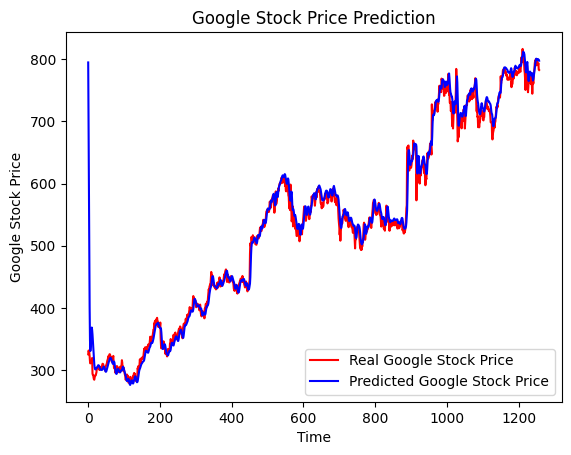

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load the training dataset
dataset_train = pd.read_csv('/content/Google_Stock_Price_Train.csv')

# Extract the training data
training_set = dataset_train.iloc[:, 1:2].values     #iloc: Stands for integer-location based indexing, : → Selects all rows, 1:2 returns a DataFrame (2D array), which is needed for scaling.

# Scale the training data
scaler = MinMaxScaler(feature_range=(0, 1))        #Normalizes stock prices to [0, 1] range for better LSTM performance.
training_set_scaled = scaler.fit_transform(training_set)

# Prepare the training data                       #Input (X_train): 60 previous days' prices (sliding window)., Output (y_train): The next day's price., Reshapes data into 3D format (samples, timesteps, features) for LSTM.

X_train, y_train = [], []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Load the testing dataset
dataset_test = pd.read_csv('/content/Google_Stock_Price_Train.csv')

# Concatenate training and testing datasets
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

# Prepare the testing data  (Making Predictions)
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predict the stock prices
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Plot the results
plt.plot(dataset_test['Open'], color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

#Red line: Actual stock prices.
#Blue line: LSTM predictions.
#Shows how well the model tracks real trends






#define Lsmt model:
      #4 LSTM layers with 50 neurons each.
      #Dropout (0.2): Randomly deactivates 20% of neurons to prevent overfitting.
      #return_sequences=True: Passes sequences between LSTM layers.
      #Dense(1): Final output layer for regression.
      #4 layers:  1layer: Studies 60 days of stock data (input).
                          #Identifies basic patterns (like daily ups/downs).
                  #2 layer: Builds on layer 1, sees longer trends (weeks, months).
                  #3 layer: Looks for even longer patterns (years).
                  #4 layer: Summarizes everything learned, predicts the next day's price.
      #More layers = better at spotting complex patterns (short-term AND long-term
      #50 neurons each: Each neuron is like a "brain cell" that remembers patterns. More neurons = more memory, but slower training.

# Compile the model:
         #Adam (Adaptive Moment Estimation) adjusts the learning rate automatically during training.
         #Measures the average squared difference between predicted and actual stock prices. (goal: minimize this).

# Train the model:
          #Epochs: (100 rounds of learning).   Too few → model may not learn well.    Too many → risk of overfitting (memorizing training data).
          #Batch Size: 32     Smaller batches → more frequent updates, but slower.    Larger batches → faster(Hard to spot errors )     32 is a common default value



#The goal is to predict future stock prices using historical data by training an LSTM (Long Short-Term Memory) or GRU (Gated Recurrent Unit) model, which are specialized deep learning models for sequential data.